In [1]:
'''
Objective function: Maximize the Sharpe ratio by charing the protfolio weight

# default rRF = 0.02 Based on the yield from 1 month T-bill
'''

### package import and settings ###
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame as df
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
from IPython.display import display_html
from sklearn import preprocessing
from collections import OrderedDict
import cvxpy as cp
from tqdm import tqdm

style.use('ggplot')

np.random.seed(36)

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True) 

In [2]:
### Get data ###
#data = web.get_data_yahoo(stock_portfolio, start="2018-04-05", end="2021-04-06", interval ='m')['Adj Close']
file = "./datasets/5_years_data_per_change.xlsx"
#file_2 = "./datasets/SP_500_stock_price_monthly.xlsx"

data = pd.read_excel(io = file, index_col = 0)
#data_monthly = pd.read_excel(io = file_2, index_col = 0)
#data.to_excel(excel_writer = "SP_500_stock_price.xlsx", index = True)

#data_per_change.to_excel(excel_writer = "data_per_change.xlsx", index = True)    


S_P_500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
S_P_500_table_df = S_P_500_table[0]
stock_portfolio = S_P_500_table_df.iloc[:,0]
stock_portfolio.replace('\.','-', regex=True,inplace=True)
S_P_500_table_df['Symbol']= stock_portfolio


display_side_by_side(data.describe())

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,AON,AOS,APA,AAPL,AMAT,APTV,ADM,ANET,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB,AVY,BKR,BLL,BAC,BK,BAX,BDX,BRK-B,BBY,BIO,BIIB,BLK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BF-B,CHRW,COG,CDNS,CZR,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CERN,CF,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CTXS,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,COO,CPRT,GLW,CTVA,COST,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISCA,DISCK,DISH,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DRE,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,EMR,ENPH,ETR,EOG,EFX,EQIX,EQR,ESS,EL,ETSY,EVRG,ES,RE,EXC,EXPE,EXPD,EXR,XOM,FFIV,FB,FAST,FRT,FDX,FIS,FITB,FE,FRC,FISV,FLT,FLIR,FMC,F,FTNT,FTV,FBHS,FOXA,FOX,BEN,FCX,GPS,GRMN,IT,GNRC,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,GWW,HAL,HBI,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HFC,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IEX,IDXX,INFO,ITW,ILMN,INCY,IR,INTC,ICE,IBM,IP,IPG,IFF,INTU,ISRG,IVZ,IPGP,IQV,IRM,JKHY,J,JBHT,SJM,JNJ,JCI,JPM,JNPR,KSU,K,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LB,LHX,LH,LRCX,LW,LVS,LEG,LDOS,LEN,LLY,LNC,LIN,LYV,LKQ,LMT,L,LOW,LUMN,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MKC,MXIM,MCD,MCK,MDT,MRK,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MHK,TAP,MDLZ,MPWR,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NLSN,NKE,NI,NSC,NTRS,NOC,NLOK,NCLH,NOV,NRG,NUE,NVDA,NVR,NXPI,ORLY,OXY,ODFL,OMC,OKE,ORCL,OTIS,PCAR,PKG,PH,PAYX,PAYC,PYPL,PENN,PNR,PBCT,PEP,PKI,PRGO,PFE,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PSA,PHM,PVH,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SNA,SO,LUV,SWK,SBUX,STT,STE,SYK,SIVB,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TWTR,TYL,TSN,UDR,ULTA,USB,UAA,UA,UNP,UAL,UNH,UPS,URI,UHS,UNM,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,VIAC,VTRS,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WST,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,207.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,413.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,459.000000,1261.000000,1261.000000,1261.000000,1261.000000,12

In [3]:
# name of the tickers with null data
print(f'''\033[1mDrop null columns\033[0m\n
The number of null columns in \033[1mdaily\033[0m dataset \033[1mbefore\033[0m dropping: {data.isna().any().sum()}\n''')

miss_tickers_lst = data.columns[data.isna().any()].tolist()

for ticker in miss_tickers_lst:
    data = data.drop(columns=[ticker])

print(f'''The number of null columns in \033[1mdaily\033[0m dataset \033[1mafter\033[0m dropping: {data.isna().any().sum()}''')

Drop null columns

The number of null columns in daily dataset before dropping: 12

The number of null columns in daily dataset after dropping: 0


In [4]:
### Calculation ###
# Base on stock price
# Daily
data_per_change = data.pct_change()

# Base on daily percentage return
mean_returns = data_per_change.mean()
covariance = data_per_change.cov()
std = data_per_change.std()
variance = data_per_change.var()


# delete missing data's ticker name
S_P_500_table_df = S_P_500_table_df[~S_P_500_table_df['Symbol'].isin(miss_tickers_lst)]

# put the ticker in dictionary based on sector
S_P_500_table_dict = dict(S_P_500_table_df.groupby('GICS Sector')['Symbol'].apply(list))

# set the ticker name as index
S_P_500_table_df = S_P_500_table_df.set_index('Symbol')

In [5]:
# match the ticker with sector and put it in dictionary
sector = []
ticker = []
for tickers in S_P_500_table_df.index:
    sector.append(S_P_500_table_df.loc[tickers,'GICS Sector'])
    ticker.append(tickers)
S_P_500_company_sector = dict(zip(ticker,sector))
#S_P_500_company_sector

In [6]:
from pypfopt import objective_functions
'''
Solver/Optimizer
    Objective:   Maximizing Sharpe ratio
    Varibales:   493 stocks from S&P 500 after droping null columns
    Constraints: 1. Max & min cap per industry 
                        0.25 or 0.125 (based on number of stocks per industry) and 0.01
                            Having higher number of stocks in industry = 0.25 and vise versa
                 2. Total weight percentage of portfolio must equals to 100%
                 3. Max & min cap per stock
                        0.00001 and 0.03
'''

mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

sector_mapper = S_P_500_company_sector

# Optimize for maximal Sharpe ratio

sector_lower = {'Health Care' : 0.01,
                'Information Technology' : 0.01,
                'Communication Services' : 0.01,
                'Consumer Discretionary' : 0.01,
                'Utilities' : 0.01,
                'Financials' : 0.01,
                'Materials' : 0.01,
                'Industrials' : 0.01,
                'Real Estate' : 0.01,
                'Consumer Staples' : 0.01,
                'Energy' : 0.01}

sector_upper = {'Health Care' : 0.125,
                'Information Technology' : 0.125,
                'Communication Services' : 0.25,
                'Consumer Discretionary' : 0.125,
                'Utilities' : 0.125,
                'Financials' : 0.125,
                'Materials' : 0.25,
                'Industrials' : 0.125,
                'Real Estate' : 0.25,
                'Consumer Staples' : 0.25,
                'Energy' : 0.25} 




ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.5)
ef.add_constraint(lambda x : sum(x) == 1)
ef.add_constraint(lambda x : x >= 0.00001)
#ef.add_constraint(lambda x : x <= 0.03)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

opt_weight = []
opt_ticker = []
for key, value in cleaned_weights.items():
    if value > 0:
        opt_weight.append(value)
        opt_ticker.append(key)
    else:
        pass

opt_weight_tbl = df(pd.Series(["{0:.2f}%".format(val * 100) for val in opt_weight], \
                          index = opt_ticker), columns = ['Optimized Portfolio Proportion'])

opt_weight = df(opt_weight, index = opt_ticker, columns = ['Optimized Portfolio Proportion'])

display(opt_weight_tbl)

ef.portfolio_performance(verbose=True)
print(f'''The total numbers of stock for portfolio is \033[1m{len(opt_weight)}\033[0m.''')

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:247: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


,Optimized Portfolio Proportion
AMD,5.37%
AES,0.80%
APD,0.14%
ALB,0.54%
ALGN,1.21%
...,...
VZ,0.44%
WMT,2.51%
WEC,0.48%
WST,2.94%


Expected annual return: 51.3%
Annual volatility: 21.2%
Sharpe Ratio: 2.33
The total numbers of stock for portfolio is 68.


In [7]:
sharpes = pd.DataFrame(columns=['Sharpe'], index = opt_ticker)
for ticker in opt_ticker:
    mean = data.loc[:,ticker].mean()
    std = data.loc[:,ticker].std()
    sharpe = round((mean-((0.02*12)/365))/std,2)
    sharpes.loc[ticker,'Sharpe'] = sharpe
sharpes    

,Sharpe
AMD,1.13
AES,3.54
APD,3.27
ALB,3.98
ALGN,2.05
...,...
VZ,7.13
WMT,3.65
WEC,4.12
WST,2.02


In [8]:
sharpe_mean = sharpes.mean()[0]

final_stock = []
for index,row in sharpes.iterrows():
    if row[0] >= sharpe_mean:
        final_stock.append(row)
    else:
        pass
    
final_stock = df(final_stock)
display(final_stock)
len(final_stock)

,Sharpe
AES,3.54
APD,3.27
ALB,3.98
AWK,3.47
AON,3.98
AJG,3.18
AVY,4.25
COG,6.86
CHTR,3.11
CHD,3.82


33

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

tickers = final_stock.index
investors_return = pd.DataFrame(index = tickers)

for ticker in tqdm(tickers):
    URL = "https://money.cnn.com/quote/forecast/forecast.html?symb=" + str(ticker) 
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    for li in soup.findAll('p'):
        for per in li.find_all("span", {"class":"posData"}):
            #print(f'''{ticker} : {per.text}''')
            investors_return.loc[ticker,'returns'] = per.text

investors_return            

100%|██████████| 33/33 [01:53<00:00,  3.44s/it]


,returns
AES,+13.76%
APD,+4.29%
ALB,NaN
AWK,+4.15%
AON,NaN
AJG,+0.93%
AVY,+7.61%
COG,+20.57%
CHTR,+10.86%
CHD,+3.22%


In [10]:
# name of the tickers with null data
print(f'''\033[1mDrop null columns\033[0m\n
The number of null rows in \033[1mdaily\033[0m dataset \033[1mbefore\033[0m dropping: {investors_return.isna().sum()[0]}\n''')

investors_return = investors_return.fillna(0)

print(f'''The number of null rows in \033[1mdaily\033[0m dataset \033[1mafter\033[0m dropping: {investors_return.isna().sum()[0]}''')

Drop null columns

The number of null rows in daily dataset before dropping: 8

The number of null rows in daily dataset after dropping: 0


In [11]:
count = 0
for view in investors_return.loc[:,'returns']:
    if view != 0:
        investors_return.loc[:,'returns'][count] = float(view.replace('%', '').replace('+', ''))/100
        count+=1
    else:
        investors_return.loc[:,'returns'][count] = float(view)
        count+=1
        pass

for index, row in investors_return.iterrows():
    print(f''''{index}' : {round(row[0],4)},''')    

'AES' : 0.1376,
'APD' : 0.0429,
'ALB' : 0.0,
'AWK' : 0.0415,
'AON' : 0.0,
'AJG' : 0.0093,
'AVY' : 0.0761,
'COG' : 0.2057,
'CHTR' : 0.1086,
'CHD' : 0.0322,
'CLX' : 0.0311,
'CME' : 0.0362,
'CMS' : 0.0469,
'CCI' : 0.0878,
'ES' : 0.0981,
'FRC' : 0.0,
'FMC' : 0.088,
'FCX' : 0.0,
'HSY' : 0.0275,
'LIN' : 0.0365,
'MKC' : 0.0409,
'MTD' : 0.0,
'NEM' : 0.1548,
'OKE' : 0.0,
'PKG' : 0.0,
'PG' : 0.0971,
'PWR' : 0.0215,
'SHW' : 0.0586,
'TMUS' : 0.1669,
'VZ' : 0.0192,
'WMT' : 0.1365,
'WEC' : 0.0,
'XEL' : 0.0142,


In [12]:
for index, row in investors_return.iterrows():
    print(f''''{index}' : {round(row[0],4)},''')    

'AES' : 0.1376,
'APD' : 0.0429,
'ALB' : 0.0,
'AWK' : 0.0415,
'AON' : 0.0,
'AJG' : 0.0093,
'AVY' : 0.0761,
'COG' : 0.2057,
'CHTR' : 0.1086,
'CHD' : 0.0322,
'CLX' : 0.0311,
'CME' : 0.0362,
'CMS' : 0.0469,
'CCI' : 0.0878,
'ES' : 0.0981,
'FRC' : 0.0,
'FMC' : 0.088,
'FCX' : 0.0,
'HSY' : 0.0275,
'LIN' : 0.0365,
'MKC' : 0.0409,
'MTD' : 0.0,
'NEM' : 0.1548,
'OKE' : 0.0,
'PKG' : 0.0,
'PG' : 0.0971,
'PWR' : 0.0215,
'SHW' : 0.0586,
'TMUS' : 0.1669,
'VZ' : 0.0192,
'WMT' : 0.1365,
'WEC' : 0.0,
'XEL' : 0.0142,


In [13]:
from pypfopt import black_litterman
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier

In [14]:
market_prices = web.get_data_yahoo("^GSPC", start="2016-01-11", end="2021-01-12")['Adj Close']
display(market_prices)
data = data.loc[:,investors_return.index]
#display(data)

Date
2016-01-11    1923.670044
2016-01-12    1938.680054
2016-01-13    1890.280029
2016-01-14    1921.839966
2016-01-15    1880.329956
                 ...     
2021-01-06    3748.139893
2021-01-07    3803.790039
2021-01-08    3824.679932
2021-01-11    3799.610107
2021-01-12    3801.189941
Name: Adj Close, Length: 1261, dtype: float64

In [15]:
returns = data.pct_change()
#returns.cov()

cov_matrix = data.cov()
display(cov_matrix)

,AES,APD,ALB,AWK,AON,AJG,AVY,COG,CHTR,CHD,...,OKE,PKG,PG,PWR,SHW,TMUS,VZ,WMT,WEC,XEL
AES,13.312577,164.566867,5.349778,87.294618,121.103607,72.091678,68.994772,-5.667906,339.049451,49.576288,...,18.256310,38.404259,69.231477,27.236466,138.425584,64.022005,21.979759,77.711480,51.824863,35.710879
APD,164.566867,2789.961539,70.130884,1403.750682,1845.001909,1103.006820,1040.868452,-94.017466,5853.250413,772.485432,...,80.941298,605.663168,1107.126994,403.643356,2239.719061,1068.985038,310.677546,1273.257830,824.678613,574.910707
ALB,5.349778,70.130884,471.855441,35.158384,47.891006,70.073191,158.713722,21.675107,702.021070,-10.140365,...,15.129583,263.238103,7.853222,116.611566,163.018533,133.900573,-15.790015,66.288567,-19.495923,6.255626
AWK,87.294618,1403.750682,35.158384,741.616379,961.706757,573.158427,537.576720,-49.316441,2998.355135,401.898222,...,47.917040,301.614440,580.586095,205.546029,1149.948007,551.251424,165.329219,662.038891,441.018745,304.596283
AON,121.103607,1845.001909,47.891006,961.706757,1420.899992,796.408530,773.895995,-59.549566,3921.036419,527.990269,...,197.079327,474.680829,748.224482,259.177746,1536.315052,706.677484,226.477816,883.328078,594.527825,410.502689
AJG,72.091678,1103.006820,70.073191,573.158427,796.408530,476.369864,461.032420,-35.448128,2369.831116,314.911533,...,83.627366,290.565915,440.165892,172.295210,930.913511,443.795412,131.937991,530.034761,339.917592,236.891990
AVY,68.994772,1040.868452,158.713722,537.576720,773.895995,461.032420,520.960136,-27.066723,2300.966462,275.007619,...,114.902869,367.591617,402.049024,184.965978,927.706588,415.977060,121.136049,521.399704,316.851778,221.710058
COG,-5.667906,-94.017466,21.675107,-49.316441,-59.549566,-35.448128,-27.066723,9.598867,-193.385508,-24.873706,...,2.251630,-5.660525,-42.155044,-9.552424,-75.121350,-34.025899,-10.392794,-39.910466,-31.122255,-19.643872
CHTR,339.049451,5853.250413,702.021070,2998.355135,3921.036419,2369.831116,2300.966462,-193.385508,14081.685133,1588.656356,...,96.260275,1561.880301,2420.696836,995.654064,4855.791385,2493.852564,618.534088,2742.726031,1734.685754,1231.652129
CHD,49.576288,772.485432,-10.140365,401.898222,527.990269,314.911533,275.007619,-24.873706,1588.656356,238.388239,...,28.662346,144.751074,319.863888,107.035247,623.643036,302.001041,94.768691,359.470832,238.763032,166.472026


In [16]:
viewdict = {'AES' : 0.1355,'APD' : 0.0449,'ALB' : 0.0,'AWK' : 0.0408,
            'AON' : 0.0,'AJG' : 0.009,'AVY' : 0.0765,'COG' : 0.2036,
            'CHTR' : 0.1094,'CHD' : 0.0343,'CLX' : 0.0346,'CME' : 0.0371,
            'CMS' : 0.0452,'CCI' : 0.0878,'ES' : 0.0968,'FRC' : 0.0,
            'FMC' : 0.0893,'FCX' : 0.0,'HSY' : 0.0286,'LIN' : 0.0384,
            'MKC' : 0.0409,'MTD' : 0.0,'NEM' : 0.155,'OKE' : 0.0,
            'PKG' : 0.0,'PG' : 0.0976,'PWR' : 0.0222,'SHW' : 0.0591,
            'TMUS' : 0.1703,'VZ' : 0.0202,'WMT' : 0.1377,'WEC' : 0.0,
            'XEL' : 0.0138}


bl = BlackLittermanModel(cov_matrix, absolute_views=viewdict)

rets = bl.bl_returns()
ef = EfficientFrontier(rets, cov_matrix)

# OR use return-implied weights
delta = black_litterman.market_implied_risk_aversion(market_prices)
bl.bl_weights(delta)
weights = bl.clean_weights()

opt_weight = []
opt_ticker = []
for key, value in weights.items():
    if value != 0:
        opt_weight.append(value)
        opt_ticker.append(key)
    else:
        pass
    
opt_weight_tbl = df(pd.Series(["{0:.2f}%".format(val * 100) for val in opt_weight], \
                          index = opt_ticker), columns = ['Optimized Portfolio Proportion'])

opt_weight = df(opt_weight, index = opt_ticker, columns = ['Optimized Portfolio Proportion'])

display(opt_weight_tbl)

print(f'''The total numbers of stock for portfolio is \033[1m{len(opt_weight)}\033[0m.''')    

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/pypfopt/black_litterman.py:257: UserWarning: Running Black-Litterman with no prior.
  warnings.warn("Running Black-Litterman with no prior.")


,Optimized Portfolio Proportion
AES,39.55%
APD,-0.08%
ALB,-1.16%
AWK,-0.14%
AON,-0.32%
AJG,-0.42%
AVY,0.08%
COG,64.71%
CHD,-0.85%
CLX,-0.43%


The total numbers of stock for portfolio is 32.


In [70]:
long_lst = df(opt_weight.loc[:,'Optimized Portfolio Proportion'][opt_weight.loc[:,'Optimized Portfolio Proportion'] >0 ])
short_lst = df(opt_weight.loc[:,'Optimized Portfolio Proportion'][opt_weight.loc[:,'Optimized Portfolio Proportion'] <0 ])
weight_dist = pd.DataFrame([len(long_lst),len(short_lst),len(long_lst)+len(short_lst)],columns=['Optimized Portfolio Proportion'],index = ['Long','Short','Total'])
weight_dist.loc[:,'Percentage'] = weight_dist.loc[:,'Optimized Portfolio Proportion']/weight_dist.loc['Total','Optimized Portfolio Proportion']
weight_dist.loc[:,'Percentage'] = ["{0:.2f}%".format(weight * 100) for weight in weight_dist.loc[:,'Percentage']]
weight_dist

display_side_by_side(long_lst, short_weight_lst,weight_dist)

,Optimized Portfolio Proportion
AES,0.39552
AVY,0.00082
COG,0.64713
CMS,0.01278
CCI,0.00137
ES,0.01834
FMC,0.00298
HSY,0.00398
NEM,0.04816
PG,0.00629


In [74]:
cleaned_weights_copy = weights.copy()
for ticker in weights:
    if ticker not in opt_weight_tbl.index:
        cleaned_weights_copy.pop(ticker)
    else:
        ticker = abs(ticker)
        pass
cleaned_weights = cleaned_weights_copy

TypeError: bad operand type for abs(): 'str'

In [82]:
abs_cleaned_weights_lst = []
abs_cleaned_weights = cleaned_weights.copy()
count = 0

for ticker in cleaned_weights:
    abs_cleaned_weights_lst.append(abs(cleaned_weights[ticker]))
    
for ticker in abs_cleaned_weights:
    abs_cleaned_weights[ticker] = abs_cleaned_weights_lst[count]
    count += 1    


In [95]:
# Fund allocation based on optimized portfolio

amount_of_fund = 200_000
latest_prices = get_latest_prices(data)

da = DiscreteAllocation(abs_cleaned_weights, latest_prices[abs_cleaned_weights], total_portfolio_value=amount_of_fund)
allocation, leftover = da.lp_portfolio()

allocated_amount = round(amount_of_fund-leftover,2)
allocation = pd.DataFrame.from_dict(allocation, orient='index', columns = ['Discrete allocation in share(s)'])
allocation['Latest Prices'] = round(latest_prices,2)
allocation['Allocated fund'] = round(allocation['Discrete allocation in share(s)'] * latest_prices,2)
allocation.loc['Total',:] = allocation.sum(axis=0)

distribution = [amount_of_fund, allocated_amount, round(leftover,2)]
distribution_df = pd.DataFrame(distribution, columns = ['Fund in USD'], \
                               index = ['Invested amount','Allocated amount','Funds remaining'])

display_side_by_side(allocation, distribution_df)

,Discrete allocation in share(s),Latest Prices,Allocated fund
AES,1042.0,25.85,26934.53
ALB,1.0,182.03,182.03
AJG,7.0,118.07,826.52
AVY,1.0,162.86,162.86
COG,6970.0,18.48,128806.71
CHD,20.0,83.61,1672.27
CLX,1.0,193.22,193.22
CMS,45.0,55.94,2517.36
CCI,1.0,149.18,149.18
ES,15.0,88.82,1332.32


100%|██████████| 1231/1231 [1:17:30<00:00,  3.78s/it]   


,632
count,"1,000.0"
mean,0.000633
std,0.000772
min,-0.001497
25%,0.000116
50%,0.000619
75%,0.001168
max,0.003063


Fraction Losses = 0.203


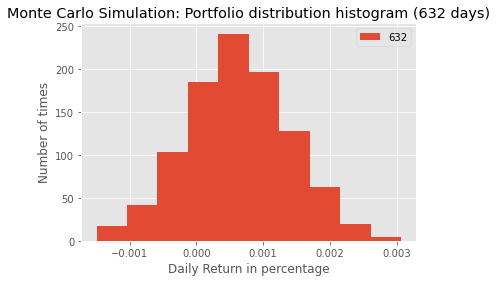

In [96]:
# Monte Carlo Simulation - Stock price as changing variables in 6 different period

Q_stats = pd.DataFrame()
for day in tqdm(range(30,1261)):
    
    prices = data.loc[:,allocation.iloc[:-1,].index]
    returns = prices.pct_change()

    np.random.seed(369)

    weighted_return = np.sum(prices * opt_weight.iloc[:,0], axis =1)
    weighted_return_per = weighted_return.pct_change()

    last_price = weighted_return[-1]

    #Number of Simulations
    num_simulations = 1_000
    num_days = day

    simulation_df = pd.DataFrame()

    for x in range(num_simulations):
        count = 0
        daily_vol = weighted_return_per.std()
        weighted_return_mean = weighted_return_per.mean()

        price_series = []

        price = last_price * (1 + np.random.normal(weighted_return_mean, daily_vol))
        price_series.append(price)

        for y in range(num_days):
            if count == day-1:
                break
            price = price_series[count] * (1 + np.random.normal(weighted_return_mean, daily_vol))
            price_series.append(price)
            count += 1

        simulation_df[x] = price_series

    #fig = plt.figure()
    #fig.suptitle(f'''Monte Carlo Simulation: Portfolio in {day} days''')
    #plt.plot(simulation_df)
    #plt.axhline(y = last_price, color = 'r', linestyle = '-')
    #plt.xlabel('Day')
    #plt.ylabel('Price')
    #plt.show()
    #plt.savefig('./graph/monte_carlo_trend_price_change.jpg')


    simulation_df = simulation_df.pct_change()
    simulation_df = simulation_df.mean(axis=0)
    #simulation_df = simulation_df.to_frame(name=day)
    Q_stats[day] = simulation_df

Q_results = pd.DataFrame(Q_stats.iloc[:,Q_stats.mean().idxmax()])
#print(Q_results)

'''
Q_results = pd.DataFrame.from_records(Q_stats, columns = ['Day', 'Total Return','Mean Return'])

Q_results.plot.scatter(x='Day', y='Mean Return')

'''
'''
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(simulation_df)
simulation_df = pd.DataFrame(x_scaled)
'''

    
display(Q_results.describe().round(6).style.format('{:,}'))
print('Fraction Losses =',(Q_results.iloc[:,0] < 0).sum()/num_simulations)

Q_results.plot.hist()
plt.title(f'''Monte Carlo Simulation: Portfolio distribution histogram ({Q_results.columns[0]} days)''')
plt.xlabel('Daily Return in percentage')
plt.ylabel('Number of times')
plt.show()
#plt.savefig('./graph/monte_carlo_hist_price_change.jpg')


<AxesSubplot:ylabel='Frequency'>

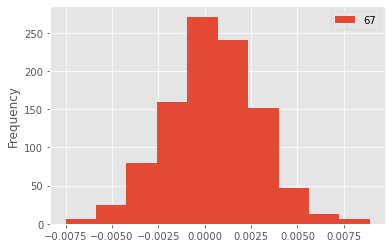

In [102]:
worse_performance = pd.DataFrame(Q_stats.iloc[:,Q_stats.mean().idxmin()])
worse_performance.plot.hist()
print('Fraction Losses =',(Q_results.iloc[:,0] < 0).sum()/num_simulations)